In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ply
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split,cross_val_predict,StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import  Counter

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Projects /churn prediction/train2.csv")

In [ ]:
df.shape

(28382, 21)

In [ ]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [ ]:
df["churn"].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

### Data Preprocessing

In [ ]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

In [ ]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,21-05-2019
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,01-11-2019
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,06-08-2019
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,03-11-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,22-10-2019
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,17-12-2019
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,31-12-2019
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [ ]:
#Convert Gender
dict_gender = {'Male': 1, 'Female':0}
df.replace({'gender': dict_gender}, inplace = True)

# Replace with -1 for missing gender
df['gender'] = df['gender'].fillna(-1)

# Replacing with max. occurence values
df['dependents'] = df['dependents'].fillna(0)
df['occupation'] = df['occupation'].fillna('self_employed')
df['city'] = df['city'].fillna(1020)

In [ ]:
df.occupation.value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [ ]:
df = pd.concat([df,pd.get_dummies(df['occupation'],prefix = str('occupation'),prefix_sep='_')],axis = 1)

In [ ]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,2101,66,1.0,0.0,self_employed,187.0,2,755,1458.71,...,0.20,1458.71,1458.71,0,21-05-2019,0,0,0,1,0
1,2,2348,35,1.0,0.0,self_employed,1020.0,2,3214,5390.37,...,100.56,6496.78,8787.61,0,01-11-2019,0,0,0,1,0
2,4,2194,31,1.0,0.0,salaried,146.0,2,41,3913.16,...,259.23,5006.28,5070.14,0,NaT,0,0,1,0,0
3,5,2329,90,-1.0,0.0,self_employed,1020.0,2,582,2291.91,...,2143.33,2291.91,1669.79,1,06-08-2019,0,0,0,1,0
4,6,1579,42,1.0,2.0,self_employed,1494.0,3,388,927.72,...,1538.06,1157.15,1677.16,1,03-11-2019,0,0,0,1,0


### Train and Test Split

In [ ]:
#x = df.drop('Attrition', axis=1)
x = df.drop(['churn','customer_id', 'occupation', 'last_transaction'], axis=1)
y = df['churn']
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=50)

In [ ]:
y_train.shape,y_test.shape

((22705,), (5677,))

In [ ]:
y_test.value_counts()/len(y_test)

0    0.814691
1    0.185309
Name: churn, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

### Handling class imbalance using SMOTE based techniques

## SMOTE Technique

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({0: 18497, 1: 18497})


B) ADASYN Technique

In [ ]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({0: 18497, 1: 18067})


C) Hybrid Techniques

SMOTE + Tomek Links

In [ ]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({0: 18122, 1: 18122})


SMOTE + ENN

In [ ]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 18497, 1: 4208})
After Counter({1: 14811, 0: 9142})


Model Building - Imbalanced data

In [ ]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

In [ ]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

Model-1: Logistic Regression

In [ ]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

LogisticRegression(C=10.0)

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[4604   21]
 [ 968   84]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      1.00      0.90      4625
           1       0.80      0.08      0.15      1052

    accuracy                           0.83      5677
   macro avg       0.81      0.54      0.52      5677
weighted avg       0.82      0.83      0.76      5677
 

AUC-ROC
0.7719755420820059


SMOTE Resampling

In [ ]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

LogisticRegression(C=10.0, class_weight='balanced')

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[3656  969]
 [ 356  696]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      4625
           1       0.42      0.66      0.51      1052

    accuracy                           0.77      5677
   macro avg       0.66      0.73      0.68      5677
weighted avg       0.82      0.77      0.78      5677
 

AUC-ROC
0.7733741650395642


ADASYN Resampling

In [ ]:
clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

LogisticRegression(C=10.0)

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')

Confusion Matrix
[[3735  890]
 [ 348  704]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      4625
           1       0.44      0.67      0.53      1052

    accuracy                           0.78      5677
   macro avg       0.68      0.74      0.69      5677
weighted avg       0.83      0.78      0.80      5677
 

AUC-ROC
0.7770186003493987


SMOTE + Tomek Resampling

In [ ]:
clf_LR.fit(X_train_smtom, y_train_smtom)
clf_LR.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

LogisticRegression(C=10.0, class_weight='balanced')

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+tomek')

Confusion Matrix
[[3634  991]
 [ 352  700]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      4625
           1       0.41      0.67      0.51      1052

    accuracy                           0.76      5677
   macro avg       0.66      0.73      0.68      5677
weighted avg       0.82      0.76      0.78      5677
 

AUC-ROC
0.7690897132874319


SMOTE + ENN Resampling

In [ ]:
clf_LR.fit(X_train_smenn, y_train_smenn)
clf_LR.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

LogisticRegression(C=10.0, class_weight='balanced')

In [ ]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+enn')

Confusion Matrix
[[3660  965]
 [ 344  708]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      4625
           1       0.42      0.67      0.52      1052

    accuracy                           0.77      5677
   macro avg       0.67      0.73      0.68      5677
weighted avg       0.82      0.77      0.79      5677
 

AUC-ROC
0.7706989004213339


Model-2: Decision Tree

In [ ]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

1. Original Unsampled Data

In [ ]:
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, min_samples_leaf=2, min_samples_split=100)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[4373  252]
 [ 580  472]] 

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4625
           1       0.65      0.45      0.53      1052

    accuracy                           0.85      5677
   macro avg       0.77      0.70      0.72      5677
weighted avg       0.84      0.85      0.84      5677
 

AUC-ROC
0.8112984277052717


SMOTE Resampling

In [ ]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, min_samples_split=100)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[3593 1032]
 [ 363  689]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4625
           1       0.40      0.65      0.50      1052

    accuracy                           0.75      5677
   macro avg       0.65      0.72      0.67      5677
weighted avg       0.81      0.75      0.77      5677
 

AUC-ROC
0.7710543623471381


3.ADASYN Resampling

In [ ]:

clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=20)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

Confusion Matrix
[[3673  952]
 [ 349  703]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.79      0.85      4625
           1       0.42      0.67      0.52      1052

    accuracy                           0.77      5677
   macro avg       0.67      0.73      0.68      5677
weighted avg       0.82      0.77      0.79      5677
 

AUC-ROC
0.7903254547322989


SMOTE + Tomek Resampling

In [ ]:
clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=100)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+tomek')

Confusion Matrix
[[3610 1015]
 [ 337  715]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      4625
           1       0.41      0.68      0.51      1052

    accuracy                           0.76      5677
   macro avg       0.66      0.73      0.68      5677
weighted avg       0.82      0.76      0.78      5677
 

AUC-ROC
0.7972124139348474


SMOTE + ENN Resampling

In [ ]:
clf_DT.fit(X_train_smenn, y_train_smenn)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=100)

In [ ]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+enn')

Confusion Matrix
[[3082 1543]
 [ 254  798]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.67      0.77      4625
           1       0.34      0.76      0.47      1052

    accuracy                           0.68      5677
   macro avg       0.63      0.71      0.62      5677
weighted avg       0.82      0.68      0.72      5677
 

AUC-ROC
0.7844987154454834


Model-3: Random Forest

Original Unsampled Data

In [ ]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=50, n_estimators=30)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[4463  162]
 [ 602  450]] 

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4625
           1       0.74      0.43      0.54      1052

    accuracy                           0.87      5677
   macro avg       0.81      0.70      0.73      5677
weighted avg       0.85      0.87      0.85      5677
 

AUC-ROC
0.837576713595725


SMOTE Resampling

In [ ]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=13, min_samples_split=20, n_estimators=50)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[3781  844]
 [ 316  736]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      4625
           1       0.47      0.70      0.56      1052

    accuracy                           0.80      5677
   macro avg       0.69      0.76      0.71      5677
weighted avg       0.84      0.80      0.81      5677
 

AUC-ROC
0.8181325660261021


ADASYN Resampling

In [ ]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=30)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

Confusion Matrix
[[3859  766]
 [ 334  718]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      4625
           1       0.48      0.68      0.57      1052

    accuracy                           0.81      5677
   macro avg       0.70      0.76      0.72      5677
weighted avg       0.84      0.81      0.82      5677
 

AUC-ROC
0.8186552255677731


SMOTE + Tomek Resampling

In [ ]:
clf_RF.fit(X_train_smtom, y_train_smtom)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=15)

In [ ]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+tomek')

Confusion Matrix
[[3825  800]
 [ 323  729]] 

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      4625
           1       0.48      0.69      0.56      1052

    accuracy                           0.80      5677
   macro avg       0.70      0.76      0.72      5677
weighted avg       0.84      0.80      0.82      5677
 

AUC-ROC
0.8213400472716063


SMOTE + ENN Resampling

In [ ]:
clf_RF.fit(X_train_smenn, y_train_smenn)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=10)

In [ ]:

test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+enn')

Confusion Matrix
[[3245 1380]
 [ 247  805]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      4625
           1       0.37      0.77      0.50      1052

    accuracy                           0.71      5677
   macro avg       0.65      0.73      0.65      5677
weighted avg       0.83      0.71      0.74      5677
 

AUC-ROC
0.7991156099064844


Model Comparision

In [ ]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [ ]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.800000,0.079848,0.145203,0.771976
1,Logistic Regression,smote,0.418018,0.661597,0.512330,0.773374
2,Logistic Regression,adasyn,0.441656,0.669202,0.532124,0.777019
3,Logistic Regression,smote+tomek,0.413956,0.665399,0.510390,0.769090
4,Logistic Regression,smote+enn,0.423192,0.673004,0.519633,0.770699
5,Decision Tree,actual,0.651934,0.448669,0.531532,0.811298
6,Decision Tree,smote,0.400349,0.654943,0.496935,0.771054
7,Decision Tree,adasyn,0.424773,0.668251,0.519394,0.790325
8,Decision Tree,smote+tomek,0.413295,0.679658,0.514019,0.797212
9,Decision Tree,smote+enn,0.340880,0.758555,0.470380,0.784499


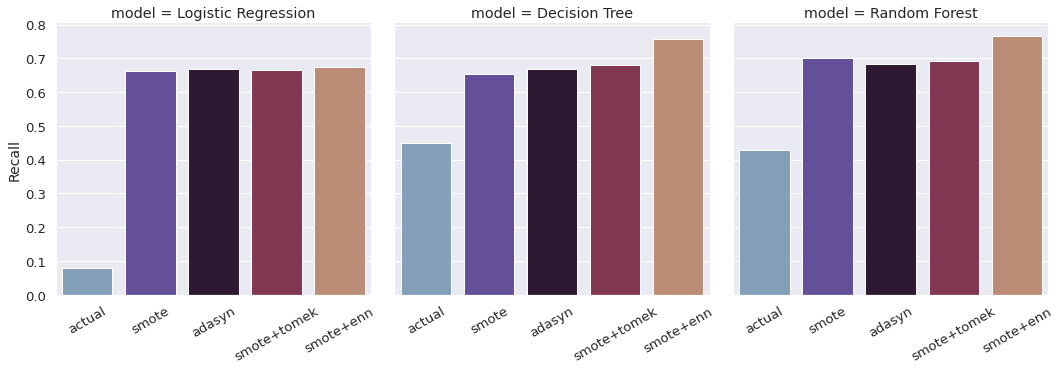

In [ ]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn", "smote+tomek", "smote+enn"])
g.set_xticklabels(rotation=30)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)